# This program is to analys recordings on ASH neurons: current clamp study

# calculate membrane potential at different current injection
# fit current clamp current curve using exponential function
# calculate time constent of membrane potential change

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
#from matplotlib import gridspec
#from matplotlib import rcParams
#from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter
#from scipy.signal import find_peaks
import pandas as pd
import sys
fpath = '/Users/LingxinW/Box/Wang/PythonStuff'
sys.path.append(fpath)
import heka_reader 

In [2]:
cd ~/Box/Wang/Ephys_recording/ASH/Ephys_recording

C:\Users\LingxinW\Box\Wang\Ephys_recording\ASH\Ephys_recording


In [281]:
myfile = heka_reader.Bundle ('20190220.dat') # pick one specific recording file

In [282]:

g =1  # group number -1
x = np.arange(len(myfile.data[g,10,0,0]))/20000



# creat empty list of 1-9 sweeps and later put all three sweeps into this empty list
cc_swps = [] # current clamp sweeps
sw1 = []
sw2 = []
sw3 = []
sw4 = []
sw5 = []
sw6 = []
sw7 = []
sw8 = []
sw9 = []


# create a for loop to collect 1-6 sweeps in three series
 
for i in range (10,13):
    sw1.append(myfile.data[g,i,0,0]*1000)
    sw2.append(myfile.data[g,i,1,0]*1000)
    sw3.append(myfile.data[g,i,2,0]*1000)
    sw4.append(myfile.data[g,i,3,0]*1000)
    sw5.append(myfile.data[g,i,4,0]*1000)
    sw6.append(myfile.data[g,i,5,0]*1000)
    sw7.append(myfile.data[g,i,6,0]*1000)
    sw8.append(myfile.data[g,i,7,0]*1000)
    sw9.append(myfile.data[g,i,8,0]*1000)
 
## here I just want to print to give one expample of the mean of three same sweeps, here sweep #1.
sw1_mean = (sw1[0]+sw1[1]+sw1[2])/3
sw2_mean = (sw2[0]+sw2[1]+sw2[2])/3
sw3_mean = (sw3[0]+sw3[1]+sw3[2])/3
sw4_mean = (sw4[0]+sw4[1]+sw4[2])/3
sw5_mean = (sw5[0]+sw5[1]+sw5[2])/3
sw6_mean = (sw6[0]+sw6[1]+sw6[2])/3
sw7_mean = (sw7[0]+sw7[1]+sw7[2])/3
sw8_mean = (sw8[0]+sw8[1]+sw8[2])/3
sw9_mean = (sw9[0]+sw9[1]+sw9[2])/3
#sw10_mean = (sw10[0]+sw10[1]+sw10[2])/3
#sw11_mean = (sw11[0]+sw11[1]+sw11[2])/3
#sw12_mean = (sw12[0]+sw12[1]+sw12[2])/3

cc_swps.append(gaussian_filter (sw1_mean, 3))
cc_swps.append(gaussian_filter (sw2_mean, 3))
cc_swps.append(gaussian_filter (sw3_mean, 3))
cc_swps.append(gaussian_filter (sw4_mean, 3))
cc_swps.append(gaussian_filter (sw5_mean, 3))
cc_swps.append(gaussian_filter (sw6_mean, 3))
cc_swps.append(gaussian_filter (sw7_mean, 3))
cc_swps.append(gaussian_filter (sw8_mean, 3))
cc_swps.append(gaussian_filter (sw9_mean, 3))
#mrc_swps.append(sw10_mean)
#mrc_swps.append(sw11_mean)
#mrc_swps.append(sw12_mean)
print (sw1_mean)

[-37.27083333 -37.36458333 -37.3125     ... -37.77083333 -37.71875
 -37.71875   ]


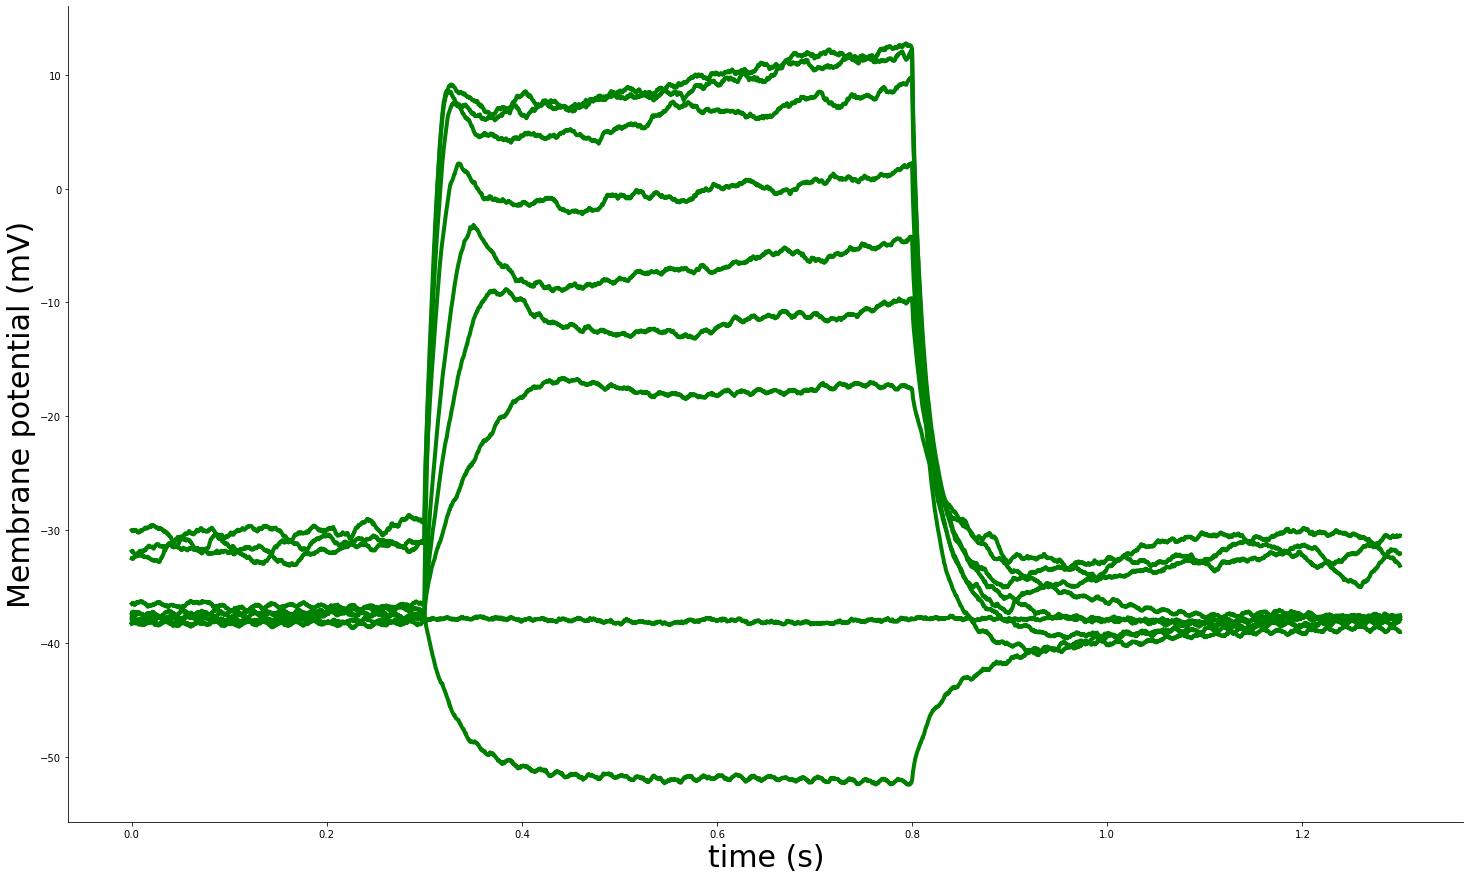

In [295]:
# here I am going to smooth the averaged sweeps one by one in a loop and plot them together



fig, ax = plt.subplots (figsize=(25,15)) # set figure size
ax.spines ['top'].set_visible (False)
ax.spines ['right'].set_visible (False)
ax.set_xlabel ('time (s)', fontsize = 30)
ax.set_ylabel ('Membrane potential (mV)', fontsize = 30)
#ax.set_xlim(0.08,0.12)


#plt.plot (x, y1, 'o', markersize = 8, color = 'b')
#plt.plot (x, stim_swp[0], 'r-', lw=4)
#plt.plot (x, stim_swp[1], 'r-', lw=4)
#plt.plot (x, stim_swp[2], 'r-', lw=4)
#plt.plot (x, stim_swp[3], 'r-', lw=4)
#plt.plot (x, stim_swp[4], 'r-', lw=4)
#plt.plot (x, stim_swp[5], 'r-', lw=4)

plt.plot (x, cc_swps[0], 'g-', lw=4)
plt.plot (x, cc_swps[1], 'g-', lw=4)
plt.plot (x, cc_swps[2], 'g-', lw=4)
plt.plot (x, cc_swps[3], 'g-', lw=4)
plt.plot (x, cc_swps[4], 'g-', lw=4)
plt.plot (x, cc_swps[5], 'g-', lw=4)
plt.plot (x, cc_swps[6], 'g-', lw=4)
plt.plot (x, cc_swps[7], 'g-', lw=4)
plt.plot (x, cc_swps[8], 'g-', lw=4)

In [296]:
# get current peak amplitude both peak and stable current size

#amp_peaks_max = [] # peak size of whole current traces

MembPot_stb =[] # peak membrane amplitude at stable state, average during time point of 80-95 ms

# it is very important to creat loops to fill the ampty lists
# do not forget to smooth the mean traces using gaussian_filter function
for i in range (0,9):
    #amp_peaks_max.append(gaussian_filter(mrc_swps[i],3)[np.argmax(gaussian_filter(mrc_swps[i][60:530],3))+60])
    MembPot_stb.append(np.mean(cc_swps[i][15000:15600])) # mean between data points of 15000-15600
    #amp_peaks_stb.append(gaussian_filter(mrc_swps[i],3)[np.argmax(gaussian_filter(mrc_swps[i][480:530],3))+480])
    #amp_peaks_on.append(gaussian_filter(mrc_swps[i],3)[np.argmax(-gaussian_filter(mrc_swps[i][700:8500],3))+700])
   
    #amp_peaks_off.append(gaussian_filter(mrc_swps[i],3)[np.argmax(-gaussian_filter(mrc_swps[i][2200:2500],3))+2200])
    #t_peaks_off.append(((np.argmax(-mrc_swps[i][2000:3500]))+2000)/5000)
    #amp_peaks_off.append(mrc_swps[i][np.argmax(-mrc_swps[i][2000:3500])+2000])

print(MembPot_stb)

                        

[-52.14459231147961, -37.96232670202296, -17.27880015032332, -10.364878253080525, -5.025608265864826, 1.065598277389449, 8.35970406993664, 11.341283592784697, 11.982891626159786]


a = -8097.350242261793 , b = 20.30685594233328, c = -23.97032789620465


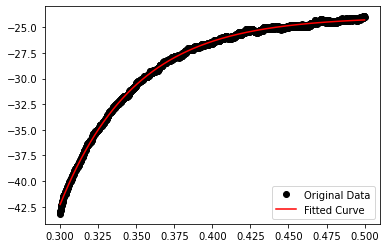

In [297]:
# fit curves with exponential function
# show example fitting curve 

def func(x, a, b, c):
    return a*np.exp(-b*x1)+c

#fit part of the curve: data points between 6000 to 10000
x1=x[6000:10000]

# scale vector to start at zero otherwise exponent is too large

x_scale = x1 - x1[0]
#define the starting point and ending point of fitting
#start = argmax(0.1*(np.mean(gaussian_filter(mrc_swps[i],3)[15000:15600])))
y=mrc_swps[2][6000:10000]
# initial guess for curve fit coefficients
guess = [0.5, 5, 1]

# coefficients and curve fit for curve
popt, pcov = curve_fit(func, x_scale, y, p0=guess,maxfev=800)

#plot fitting curve and raw data

print ("a = %s , b = %s, c = %s" % (popt[0], popt[1], popt[2]))
plt.figure()
plt.plot(x1, y, 'ko', label="Original Data")
plt.plot(x1, func(x1, *popt), 'r-', label="Fitted Curve")
plt.legend(loc='lower right')
plt.show()

In [298]:
# calculate time constents of cc curves 2-9
# fit curves with exponential function
def func(x, a, b, c):
    return a*np.exp(-b*x1)+c
tau = []
#fit part of the curve: data points between 6000 to 10000
x1=x[6000:10000]

# scale vector to start at zero otherwise exponent is too large

x_scale = x1 - x1[0]
#define the starting point and ending point of fitting
#start = argmax(0.1*(np.mean(gaussian_filter(mrc_swps[i],3)[15000:15600])))
for i in range (0,9):
    y=mrc_swps[i][6000:10000]
# initial guess for curve fit coefficients
    guess = [0.5, 5, 1]

# coefficients and curve fit for curve
    popt, pcov = curve_fit(func, x_scale, y, p0=guess,maxfev=800)
    print ("a = %s , b = %s, c = %s" % (popt[0], popt[1], popt[2]))
    tau.append(1/popt[1])
print (tau)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


a = 283.87486264687647 , b = 2525.2377546942957, c = -52.92007541542542
a = 29.12123200621382 , b = 332.6922895845447, c = -42.1692421875
a = -8097.350242261793 , b = 20.30685594233328, c = -23.97032789620465
a = -7082476.092536812 , b = 41.454497268116185, c = -15.253573088930098
a = -8434019482.119807 , b = 64.73879359572516, c = -10.909105744924963
a = -1808461604754.584 , b = 82.18275185813184, c = -7.264538261112971
a = -91418728744397.89 , b = 94.93766300076997, c = -4.153457815409701
a = -5954134356820817.0 , b = 109.0183101729882, c = -0.1526113639679766
a = -7534933509817893.0 , b = 109.40876843714187, c = 2.533820302167151
[0.00039600231627340754, 0.003005780510419305, 0.049244452358344695, 0.02412283505773276, 0.015446688831501985, 0.012168003350949507, 0.010533227471502956, 0.009172771054818396, 0.009140035248404477]


In [279]:
stim = [-2,0,2,4,6,8,10,12,14]
worm_strain = 9*['HA1134']
cell_ID = 9*['ASHLW021']

ASH_Peak_Data = {'worm_strain': worm_strain, 'cell_ID': cell_ID,'stim_um': stim, 'MembranePotential': MembPot_stb, 'tau':tau, 'group_number': g+1}
EphysDataFrame = pd.DataFrame(ASH_Peak_Data)
#EphysDataFrame = EphysDataFrame.set_index(['cell_ID'])

EphysDataFrame

,worm_strain,cell_ID,stim_um,MembranePotential,tau,group_number
0,HA1134,ASHLW021,-2,-51.363530,0.000396,5
1,HA1134,ASHLW021,0,-43.007165,0.003006,5
2,HA1134,ASHLW021,2,-24.052447,0.049244,5
3,HA1134,ASHLW021,4,-13.965418,0.024123,5
4,HA1134,ASHLW021,6,-8.283962,0.015447,5
5,HA1134,ASHLW021,8,-4.752454,0.012168,5
6,HA1134,ASHLW021,10,-0.752636,0.010533,5
7,HA1134,ASHLW021,12,2.255155,0.009173,5
8,HA1134,ASHLW021,14,4.882353,0.009140,5


In [280]:
dfpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ASH/Ephys_recording/ExtractedData/CurrentClamp_MembPot' 
##C:\Users\LingxinW\Box\Wang\Ephys_recording\ASH\Ephys_recording\ExtractedData\CurrentClamp_MembPot

#wb = pd.ExcelWriter(dfpath +'ALMLW001.xlsx', engine='xlsxwriter')
EphysDataFrame.to_csv(r'C:/Users/LingxinW/Box/Wang/Ephys_recording/ASH/Ephys_recording/ExtractedData/CurrentClamp_MembPot/ASHLW021.csv',index =False, index_label = 'stim_um')

#wb.save()